<a href="https://colab.research.google.com/github/Alisya0910/SkripsiAlisya/blob/Final/DataPreprocessingAnies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proses Data Preprocessing**

1.   Cleaning Data (membersihkan data
twitter dari mention, url, dll)
2. Casefolding (mengubah huruf kapital menjadi huruf kecil)
3.  Stemming (mengubah kata menjadi kata dasarnya)
4. Filtering (menghapus stopword dan tokenize)
5. TF - IDF

In [39]:
#mengimport library  yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re

menampilkan data asli

In [40]:
anies = pd.read_excel('AniesPresidentTweets.xlsx')

anies

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Nov 07 05:04:48 +0000 2023,1721760000000000000,@Koriandri @aniesbaswedan @mohmahfudmd Beneran...,0,0,0,0,in,1225950000000000000,1717510000000000000,Bentir16,https://twitter.com/Bentir16/status/1721755558...
1,Tue Nov 07 05:02:38 +0000 2023,1721760000000000000,Ini membahas lapangan hasil karya anak bangsa ...,0,0,0,0,in,1444320000000000000,1721760000000000000,choymarkochoy,https://twitter.com/choymarkochoy/status/17217...
2,Tue Nov 07 05:02:43 +0000 2023,1721760000000000000,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...,0,0,0,0,in,1539650000000000000,1721760000000000000,Ketik_salah24,https://twitter.com/Ketik_salah24/status/17217...
3,Tue Nov 07 05:03:52 +0000 2023,1721760000000000000,@Tita83079013 Tapi aku ragu ketiga calon bahas...,0,0,0,0,in,1576420000000000000,1721750000000000000,AgustiniRahay12,https://twitter.com/AgustiniRahay12/status/172...
4,Tue Nov 07 05:02:37 +0000 2023,1721760000000000000,@DPP_PKB @aniesbaswedan @cakimiNOW Bbm gratis ...,0,0,0,0,in,794275000000000000,1721720000000000000,PanjenSuwantai,https://twitter.com/PanjenSuwantai/status/1721...
...,...,...,...,...,...,...,...,...,...,...,...,...
505,Mon Nov 06 18:21:28 +0000 2023,1721590000000000000,@DokterTifa @aniesbaswedan @prabowo @ganjarpra...,0,1,0,0,in,1386660000000000000,1721320000000000000,Jangkrikgengg15,https://twitter.com/Jangkrikgengg15/status/172...
506,Mon Nov 06 18:20:51 +0000 2023,1721590000000000000,@chyntiaaasari Wah.. Wah.. Wah.. Ini pasti man...,0,0,0,0,in,1412710000000000000,1721380000000000000,TogarHasibu4n,https://twitter.com/TogarHasibu4n/status/17215...
507,Mon Nov 06 18:20:34 +0000 2023,1721590000000000000,@dhemit_is_back @cakimiNOW @aniesbaswedan Mate...,0,0,0,0,in,220018345,1721180000000000000,samsudinhusaini,https://twitter.com/samsudinhusaini/status/172...
508,Mon Nov 06 18:18:53 +0000 2023,1721590000000000000,@sim44237 @KompasTV @aniesbaswedan Kalo GBT......,0,0,0,0,in,1131240000000000000,1721410000000000000,Kwangwung5,https://twitter.com/Kwangwung5/status/17215930...


# 1. **Cleaning Data**
---
Membersihkan data dari mention, url, emoji, dan lainnya


Menampilkan attribut full_text saja karena attribut full_text yang akan di pre-processing

In [41]:
aniescf = anies[['full_text']]

aniescf

,full_text
0,@Koriandri @aniesbaswedan @mohmahfudmd Beneran...
1,Ini membahas lapangan hasil karya anak bangsa ...
2,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...
3,@Tita83079013 Tapi aku ragu ketiga calon bahas...
4,@DPP_PKB @aniesbaswedan @cakimiNOW Bbm gratis ...
...,...
505,@DokterTifa @aniesbaswedan @prabowo @ganjarpra...
506,@chyntiaaasari Wah.. Wah.. Wah.. Ini pasti man...
507,@dhemit_is_back @cakimiNOW @aniesbaswedan Mate...
508,@sim44237 @KompasTV @aniesbaswedan Kalo GBT......


In [42]:
aniescf['clean_text'] = aniescf.loc[:, 'full_text']

<ipython-input-42-db67490bdd13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['clean_text'] = aniescf.loc[:, 'full_text']


In [43]:
aniescf

,full_text,clean_text
0,@Koriandri @aniesbaswedan @mohmahfudmd Beneran...,@Koriandri @aniesbaswedan @mohmahfudmd Beneran...
1,Ini membahas lapangan hasil karya anak bangsa ...,Ini membahas lapangan hasil karya anak bangsa ...
2,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...
3,@Tita83079013 Tapi aku ragu ketiga calon bahas...,@Tita83079013 Tapi aku ragu ketiga calon bahas...
4,@DPP_PKB @aniesbaswedan @cakimiNOW Bbm gratis ...,@DPP_PKB @aniesbaswedan @cakimiNOW Bbm gratis ...
...,...,...
505,@DokterTifa @aniesbaswedan @prabowo @ganjarpra...,@DokterTifa @aniesbaswedan @prabowo @ganjarpra...
506,@chyntiaaasari Wah.. Wah.. Wah.. Ini pasti man...,@chyntiaaasari Wah.. Wah.. Wah.. Ini pasti man...
507,@dhemit_is_back @cakimiNOW @aniesbaswedan Mate...,@dhemit_is_back @cakimiNOW @aniesbaswedan Mate...
508,@sim44237 @KompasTV @aniesbaswedan Kalo GBT......,@sim44237 @KompasTV @aniesbaswedan Kalo GBT......


In [44]:
#Text-Cleaning (URLs, Mentions, etc)
#installing tweet-preprocessor
!pip install tweet-preprocessor

In [45]:
import preprocessor as p

In [46]:
def preprocess_tweet(row):
    text = row['clean_text']
    text = p.clean(text)
    return text

aniescf['clean_text'] = aniescf.apply(preprocess_tweet, axis=1)

<ipython-input-46-536399ed8b37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['clean_text'] = aniescf.apply(preprocess_tweet, axis=1)


In [47]:
aniescf

,full_text,clean_text
0,@Koriandri @aniesbaswedan @mohmahfudmd Beneran...,Beneran blum tau? Kalo Anies bukankah petugas ...
1,Ini membahas lapangan hasil karya anak bangsa ...,Ini membahas lapangan hasil karya anak bangsa ...
2,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...
3,@Tita83079013 Tapi aku ragu ketiga calon bahas...,Tapi aku ragu ketiga calon bahas ekonomi syari...
4,@DPP_PKB @aniesbaswedan @cakimiNOW Bbm gratis ...,Bbm gratis jadi ??? Taik
...,...,...
505,@DokterTifa @aniesbaswedan @prabowo @ganjarpra...,Bos bilingnya begono
506,@chyntiaaasari Wah.. Wah.. Wah.. Ini pasti man...,Wah.. Wah.. Wah.. Ini pasti mantannya yang mer...
507,@dhemit_is_back @cakimiNOW @aniesbaswedan Mate...,Materi kampanye nya kacau balau... Timses maka...
508,@sim44237 @KompasTV @aniesbaswedan Kalo GBT......,Kalo GBT....bukan karya anak bangsa...ya???


#2. **Casefolding**
---
menghapus tanda baca, extra whitespace dan mengubah huruf besar manjadi huruf kecil


In [48]:
#menghapus extra white space, punctuation, dan menlowercase kan
aniescf['clean_text'] = aniescf['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d+', '')

<ipython-input-48-9ef3fbb57e57>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  aniescf['clean_text'] = aniescf['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d+', '')
<ipython-input-48-9ef3fbb57e57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['clean_text'] = aniescf['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ').str.replace('\d+', '')


In [49]:
aniescf

,full_text,clean_text
0,@Koriandri @aniesbaswedan @mohmahfudmd Beneran...,beneran blum tau kalo anies bukankah petugas p...
1,Ini membahas lapangan hasil karya anak bangsa ...,ini membahas lapangan hasil karya anak bangsa ...
2,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...,hanya ganjar yang konsisten tolak israel datan...
3,@Tita83079013 Tapi aku ragu ketiga calon bahas...,tapi aku ragu ketiga calon bahas ekonomi syari...
4,@DPP_PKB @aniesbaswedan @cakimiNOW Bbm gratis ...,bbm gratis jadi taik
...,...,...
505,@DokterTifa @aniesbaswedan @prabowo @ganjarpra...,bos bilingnya begono
506,@chyntiaaasari Wah.. Wah.. Wah.. Ini pasti man...,wah wah wah ini pasti mantannya yang merapat k...
507,@dhemit_is_back @cakimiNOW @aniesbaswedan Mate...,materi kampanye nya kacau balau timses makan g...
508,@sim44237 @KompasTV @aniesbaswedan Kalo GBT......,kalo gbt bukan karya anak bangsa ya


#3. **Stemming**

---
https://ksnugroho.medium.com/dasar-text-preprocessing-dengan-python-*a4fa52608ffe*


In [50]:
pip install Sastrawi

In [51]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat DataFrame contoh
aniescf['stemword'] = pd.DataFrame(aniescf['clean_text'])


# Mendefinisikan fungsi stemming
def stemming(text):
    return stemmer.stem(text)

# Menerapkan fungsi stemming ke kolom 'TextColumn'
aniescf['stemword'] = aniescf['clean_text'].apply(str).apply(stemming)

# Menampilkan DataFrame hasil


<ipython-input-51-c0b5040c251d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['stemword'] = pd.DataFrame(aniescf['clean_text'])
<ipython-input-51-c0b5040c251d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['stemword'] = aniescf['clean_text'].apply(str).apply(stemming)


In [52]:
aniescf

,full_text,clean_text,stemword
0,@Koriandri @aniesbaswedan @mohmahfudmd Beneran...,beneran blum tau kalo anies bukankah petugas p...,beneran blum tau kalo anies bukankah tugas par...
1,Ini membahas lapangan hasil karya anak bangsa ...,ini membahas lapangan hasil karya anak bangsa ...,ini bahas lapang hasil karya anak bangsa yg ba...
2,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...,hanya ganjar yang konsisten tolak israel datan...,hanya ganjar yang konsisten tolak israel datan...
3,@Tita83079013 Tapi aku ragu ketiga calon bahas...,tapi aku ragu ketiga calon bahas ekonomi syari...,tapi aku ragu tiga calon bahas ekonomi syariah...
4,@DPP_PKB @aniesbaswedan @cakimiNOW Bbm gratis ...,bbm gratis jadi taik,bbm gratis jadi taik
...,...,...,...
505,@DokterTifa @aniesbaswedan @prabowo @ganjarpra...,bos bilingnya begono,bos bilingnya begono
506,@chyntiaaasari Wah.. Wah.. Wah.. Ini pasti man...,wah wah wah ini pasti mantannya yang merapat k...,wah wah wah ini pasti mantan yang rapat ke nya...
507,@dhemit_is_back @cakimiNOW @aniesbaswedan Mate...,materi kampanye nya kacau balau timses makan g...,materi kampanye nya kacau balau timses makan g...
508,@sim44237 @KompasTV @aniesbaswedan Kalo GBT......,kalo gbt bukan karya anak bangsa ya,kalo gbt bukan karya anak bangsa ya


In [53]:
aniescf[['clean_text','stemword']]

,clean_text,stemword
0,beneran blum tau kalo anies bukankah petugas p...,beneran blum tau kalo anies bukankah tugas par...
1,ini membahas lapangan hasil karya anak bangsa ...,ini bahas lapang hasil karya anak bangsa yg ba...
2,hanya ganjar yang konsisten tolak israel datan...,hanya ganjar yang konsisten tolak israel datan...
3,tapi aku ragu ketiga calon bahas ekonomi syari...,tapi aku ragu tiga calon bahas ekonomi syariah...
4,bbm gratis jadi taik,bbm gratis jadi taik
...,...,...
505,bos bilingnya begono,bos bilingnya begono
506,wah wah wah ini pasti mantannya yang merapat k...,wah wah wah ini pasti mantan yang rapat ke nya...
507,materi kampanye nya kacau balau timses makan g...,materi kampanye nya kacau balau timses makan g...
508,kalo gbt bukan karya anak bangsa ya,kalo gbt bukan karya anak bangsa ya


#4. **Filtering (Penghapusan stopword & Tokenizing)**


---
tokenize memenggal kalimat menjadi perkata, Penghapusan stopword berfungsi untuk menghilangkan kata yang tidak memiliki nilai sentimen atau kata dasar seperti kata yang, dan, di, dari, dan lain sebagainya.



In [54]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download kumpulan stopword untuk bahasa Indonesia
nltk.download('punkt')
nltk.download('stopwords')

# Contoh DataFrame
aniescf['stemword'] = pd.DataFrame(aniescf['stemword'])

# Fungsi untuk melakukan tokenisasi dan penghapusan stopword
def tokenize_and_remove_stopwords(text):
    # Tokenisasi kata-kata
    words = word_tokenize(text)

    # Mengambil stopword bahasa Indonesia
    stop_words = set(stopwords.words('indonesian'))

    # Menghapus stopword dari kata-kata
    filtered_words = [word for word in words if word.lower() not in stop_words]

    return filtered_words

# Tokenisasi dan penghapusan stopword pada setiap elemen dalam kolom 'Text'
aniescf['Tokenized_and_No_Stopwords'] = aniescf['stemword'].apply(tokenize_and_remove_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-54-bb93f28eab4e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['stemword'] = pd.DataFrame(aniescf['stemword'])
<ipython-input-54-bb93f28eab4e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['Tokenized_and_No_Stopwords'] = aniescf['stemword'].ap

In [55]:
aniescf

,full_text,clean_text,stemword,Tokenized_and_No_Stopwords
0,@Koriandri @aniesbaswedan @mohmahfudmd Beneran...,beneran blum tau kalo anies bukankah petugas p...,beneran blum tau kalo anies bukankah tugas par...,"[beneran, blum, tau, kalo, anies, tugas, parta..."
1,Ini membahas lapangan hasil karya anak bangsa ...,ini membahas lapangan hasil karya anak bangsa ...,ini bahas lapang hasil karya anak bangsa yg ba...,"[bahas, lapang, hasil, karya, anak, bangsa, yg..."
2,HANYA GANJAR YANG KONSISTEN TOLAK ISRAEL DATAN...,hanya ganjar yang konsisten tolak israel datan...,hanya ganjar yang konsisten tolak israel datan...,"[ganjar, konsisten, tolak, israel, indonesia]"
3,@Tita83079013 Tapi aku ragu ketiga calon bahas...,tapi aku ragu ketiga calon bahas ekonomi syari...,tapi aku ragu tiga calon bahas ekonomi syariah...,"[ragu, calon, bahas, ekonomi, syariah, melulu,..."
4,@DPP_PKB @aniesbaswedan @cakimiNOW Bbm gratis ...,bbm gratis jadi taik,bbm gratis jadi taik,"[bbm, gratis, taik]"
...,...,...,...,...
505,@DokterTifa @aniesbaswedan @prabowo @ganjarpra...,bos bilingnya begono,bos bilingnya begono,"[bos, bilingnya, begono]"
506,@chyntiaaasari Wah.. Wah.. Wah.. Ini pasti man...,wah wah wah ini pasti mantannya yang merapat k...,wah wah wah ini pasti mantan yang rapat ke nya...,"[mantan, rapat, nyata, ya, kadrunnya]"
507,@dhemit_is_back @cakimiNOW @aniesbaswedan Mate...,materi kampanye nya kacau balau timses makan g...,materi kampanye nya kacau balau timses makan g...,"[materi, kampanye, nya, kacau, balau, timses, ..."
508,@sim44237 @KompasTV @aniesbaswedan Kalo GBT......,kalo gbt bukan karya anak bangsa ya,kalo gbt bukan karya anak bangsa ya,"[kalo, gbt, karya, anak, bangsa, ya]"


In [56]:
aniescf[['stemword','Tokenized_and_No_Stopwords']]

,stemword,Tokenized_and_No_Stopwords
0,beneran blum tau kalo anies bukankah tugas par...,"[beneran, blum, tau, kalo, anies, tugas, parta..."
1,ini bahas lapang hasil karya anak bangsa yg ba...,"[bahas, lapang, hasil, karya, anak, bangsa, yg..."
2,hanya ganjar yang konsisten tolak israel datan...,"[ganjar, konsisten, tolak, israel, indonesia]"
3,tapi aku ragu tiga calon bahas ekonomi syariah...,"[ragu, calon, bahas, ekonomi, syariah, melulu,..."
4,bbm gratis jadi taik,"[bbm, gratis, taik]"
...,...,...
505,bos bilingnya begono,"[bos, bilingnya, begono]"
506,wah wah wah ini pasti mantan yang rapat ke nya...,"[mantan, rapat, nyata, ya, kadrunnya]"
507,materi kampanye nya kacau balau timses makan g...,"[materi, kampanye, nya, kacau, balau, timses, ..."
508,kalo gbt bukan karya anak bangsa ya,"[kalo, gbt, karya, anak, bangsa, ya]"


# 5. **Data Labeling**

---
Melabelkan sentimen analisis data


membuat variable anies_sentimen untuk menampung data yang perlu di labelkan

In [57]:
!pip install transformers

In [58]:
from transformers import pipeline
import pandas as pd

# Inisialisasi model BERT untuk analisis sentimen
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Fungsi untuk prediksi sentimen pada teks
def predict_sentiment(text):
    result = classifier(text)[0]
    sentiment_label = result['label']
    sentiment_score = result['score']
    return sentiment_label, sentiment_score

# Prediksi sentimen untuk setiap teks dalam series
sentiment_predictions = aniescf['clean_text'].apply(predict_sentiment)

# Menyatukan hasil prediksi dengan dataset
result_df = pd.DataFrame(list(sentiment_predictions), columns=['Sentimen_Label', 'Sentimen_Score'])
final_result = pd.concat([aniescf['clean_text'], result_df], axis=1)

print(final_result)

                                            clean_text Sentimen_Label  \
0    beneran blum tau kalo anies bukankah petugas p...         1 star   
1    ini membahas lapangan hasil karya anak bangsa ...        5 stars   
2    hanya ganjar yang konsisten tolak israel datan...         1 star   
3    tapi aku ragu ketiga calon bahas ekonomi syari...        2 stars   
4                                 bbm gratis jadi taik         1 star   
..                                                 ...            ...   
505                               bos bilingnya begono        3 stars   
506  wah wah wah ini pasti mantannya yang merapat k...        3 stars   
507  materi kampanye nya kacau balau timses makan g...        3 stars   
508               kalo gbt bukan karya anak bangsa ya          1 star   
509  istilah silent mayority awalnya di gagas oleh ...        2 stars   

     Sentimen_Score  
0          0.514378  
1          0.423526  
2          0.330613  
3          0.350466  
4          0.

In [59]:
import pandas as pd

def Sentiment_startovalue(label):
    if label in ["1 star", "2 stars"]:
        return 'Negative'
    elif label == "3 stars":
        return 'Neutral'
    elif label in ["4 stars", "5 stars"]:
        return 'Positive'
    else:
        return 'Unknown'

# Apply the function to the entire 'Sentimen_Label' column
aniescf['Sentimen_value'] = result_df['Sentimen_Label'].apply(Sentiment_startovalue)


<ipython-input-59-6e2e517f0593>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['Sentimen_value'] = result_df['Sentimen_Label'].apply(Sentiment_startovalue)


In [60]:
aniescf['Labeling'] = result_df['Sentimen_Label']
aniescf['Sentimen_score'] = result_df['Sentimen_Score']

<ipython-input-60-fefe03076282>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['Labeling'] = result_df['Sentimen_Label']
<ipython-input-60-fefe03076282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aniescf['Sentimen_score'] = result_df['Sentimen_Score']


In [61]:
aniescf[['clean_text','Sentimen_value','Labeling','Sentimen_score']]

,clean_text,Sentimen_value,Labeling,Sentimen_score
0,beneran blum tau kalo anies bukankah petugas p...,Negative,1 star,0.514378
1,ini membahas lapangan hasil karya anak bangsa ...,Positive,5 stars,0.423526
2,hanya ganjar yang konsisten tolak israel datan...,Negative,1 star,0.330613
3,tapi aku ragu ketiga calon bahas ekonomi syari...,Negative,2 stars,0.350466
4,bbm gratis jadi taik,Negative,1 star,0.285715
...,...,...,...,...
505,bos bilingnya begono,Neutral,3 stars,0.262743
506,wah wah wah ini pasti mantannya yang merapat k...,Neutral,3 stars,0.270677
507,materi kampanye nya kacau balau timses makan g...,Neutral,3 stars,0.278682
508,kalo gbt bukan karya anak bangsa ya,Negative,1 star,0.454127


In [62]:
senti_anies = aniescf[['clean_text','Sentimen_value']]

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
senti_anies['label'] = label_encoder.fit_transform(senti_anies['Sentimen_value'])

<ipython-input-62-1892ddfd3e21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_anies['label'] = label_encoder.fit_transform(senti_anies['Sentimen_value'])


In [63]:
senti_anies

,clean_text,Sentimen_value,label
0,beneran blum tau kalo anies bukankah petugas p...,Negative,0
1,ini membahas lapangan hasil karya anak bangsa ...,Positive,2
2,hanya ganjar yang konsisten tolak israel datan...,Negative,0
3,tapi aku ragu ketiga calon bahas ekonomi syari...,Negative,0
4,bbm gratis jadi taik,Negative,0
...,...,...,...
505,bos bilingnya begono,Neutral,1
506,wah wah wah ini pasti mantannya yang merapat k...,Neutral,1
507,materi kampanye nya kacau balau timses makan g...,Neutral,1
508,kalo gbt bukan karya anak bangsa ya,Negative,0


In [64]:
senti_anies['Sentimen_value'].value_counts()

Negative    271
Positive    168
Neutral      71
Name: Sentimen_value, dtype: int64

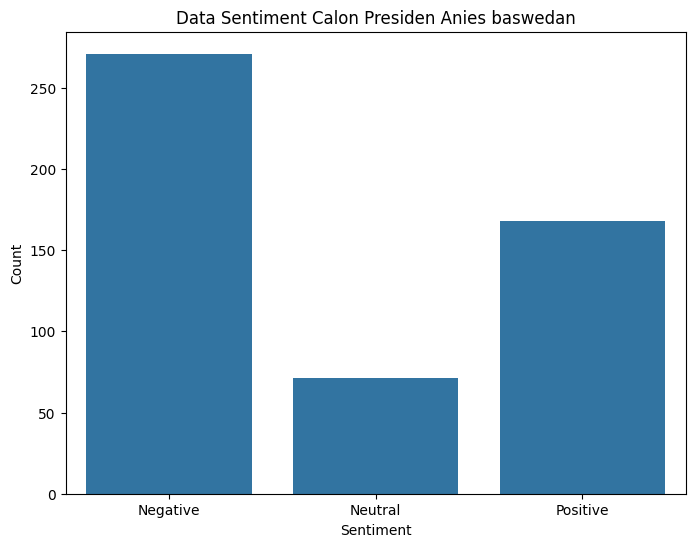

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = dict(zip(*np.unique(senti_anies['Sentimen_value'], return_counts=True)))

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()))
plt.title('Data Sentiment Calon Presiden Anies baswedan')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()


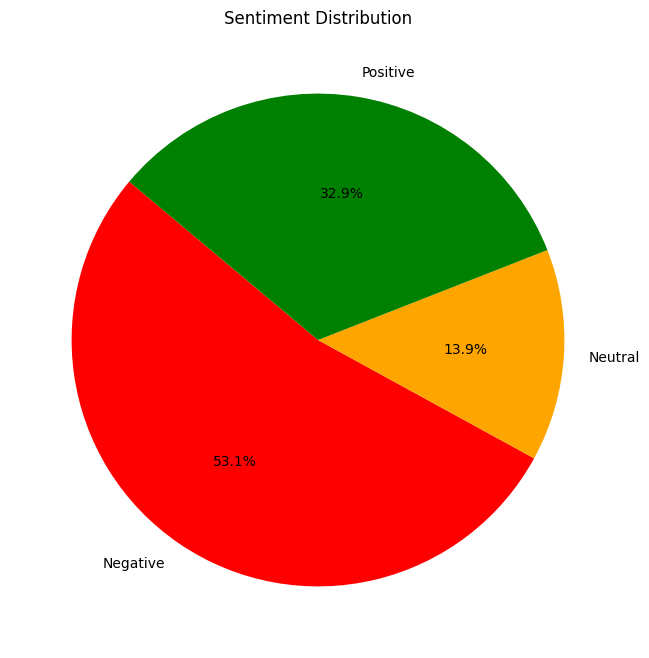

In [66]:
# Count the occurrences of each sentiment
sentiments = senti_anies['Sentimen_value'].value_counts()

# Create a pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'green'])
plt.title('Sentiment Distribution')
plt.show()

# 6. **Data Split**

---


In [67]:
from sklearn.model_selection import train_test_split

# Misalnya, X adalah fitur dan y adalah label
X_train, X_test, y_train, y_test = train_test_split(senti_anies['clean_text'],
                          senti_anies['label'],test_size=0.2, random_state=42)


In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 7. **Analisis Menggunakan Naive Bayes**

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [70]:
# Predictions on the test set
predictions = naive_bayes.predict(X_test_vectorized)

# Evaluate the model
accuracy_NB = accuracy_score(y_test, predictions)
print(f'Accuracy of Naive Bayes Multinomial classifier on test set: {accuracy_NB:.2f}')

# Classification report
print('\nClassification Report:\n', classification_report(y_test, predictions))

# Confusion matrix
conf_matrix_NB = confusion_matrix(y_test, predictions)

conf_matrix_NB_percent = conf_matrix_NB.astype('float')/ conf_matrix_NB.sum(axis=1)[:, np.newaxis]

print('\nConfusion Matrix:\n', conf_matrix_NB)


Accuracy of Naive Bayes Multinomial classifier on test set: 0.63

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75        59
           1       0.75      0.19      0.30        16
           2       0.54      0.26      0.35        27

    accuracy                           0.63       102
   macro avg       0.64      0.45      0.47       102
weighted avg       0.63      0.63      0.57       102


Confusion Matrix:
 [[54  1  4]
 [11  3  2]
 [20  0  7]]


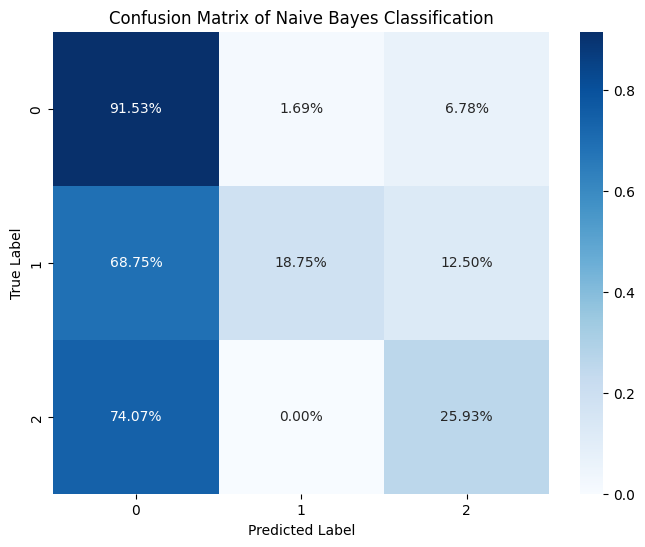

In [71]:
# Example: Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_NB_percent, annot=True, cmap='Blues', xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_, fmt='.2%')
plt.title('Confusion Matrix of Naive Bayes Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 8. **Analisis Menggunakan Regresi Logistik**


In [72]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_vectorized, y_train)

LogisticRegression()

In [73]:
# Prediksi pada set pengujian
predictions = logistic_regression.predict(X_test_vectorized)

# Evaluasi model
accuracy_RL = accuracy_score(y_test, predictions)
print(f'Accuracy of Logistic Regression classifier on test set: {accuracy_RL:.2f}')

# Laporan klasifikasi
print('\nLaporan Klasifikasi:\n', classification_report(y_test, predictions))

# Matriks kebingungan
conf_matrix_LR = confusion_matrix(y_test, predictions)

conf_matrix_LR_percent = conf_matrix_LR.astype('float')/ conf_matrix_NB.sum(axis=1)[:, np.newaxis]


print('\nConfusion Matrix:\n', conf_matrix_LR)

Accuracy of Logistic Regression classifier on test set: 0.61

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72        59
           1       0.50      0.06      0.11        16
           2       0.44      0.70      0.54        27

    accuracy                           0.61       102
   macro avg       0.56      0.49      0.46       102
weighted avg       0.62      0.61      0.58       102


Confusion Matrix:
 [[42  0 17]
 [ 8  1  7]
 [ 7  1 19]]


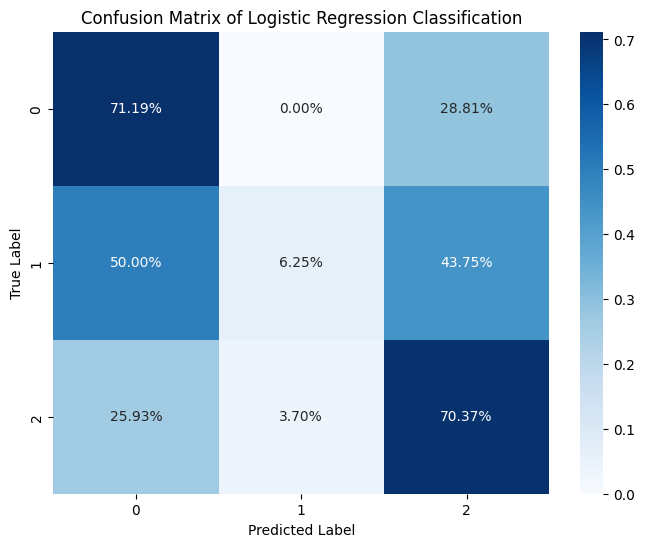

In [74]:
# Example: Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR_percent, annot=True, cmap='Blues', xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_, fmt='.2%')
plt.title('Confusion Matrix of Logistic Regression Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. **Confusion Matrix**

In [75]:
print('Accuration of Naive Bayes Multinomial Classification :', accuracy_NB)
print('Accuration of Logistic Regression Classification :', accuracy_RL)

Accuration of Naive Bayes Multinomial Classification : 0.6274509803921569
Accuration of Logistic Regression Classification : 0.6078431372549019
